In [56]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import cv2
import skimage

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from skimage.metrics import structural_similarity as ssim

<p style="align: center;"><img align=center src="https://netology.ru/backend/tilda/images/tild3439-3364-4535-b334-656263633534__main.svg"  width=900></p>
<h3 style="text-align: center;"><b>Алгоритмы кластеризации</b></h3>

#  Домашнее задание

#### Задание  

В домашнем задании нужно сократить число цветов в палитре изображения. Картинку для выполнения работы можно выбрать любую, главное условие – наличие на ней разных цветов, для того, чтобы результат работы моделей был заметен.
Для выполнения работы необходимо выделить кластеры в пространстве RGB, объекты соответствуют пикселям изображения. После выделения кластеров все пиксели, отнесенные в один кластер, заполняются одним цветом. Цвет – центроид соответствующего кластера.


1. Получите данные и загрузите их в рабочую среду (Jupyter Notebook или другую).
        a) Для отображения картинки воспользуйтесь вспомогательной функцией:
                import matplotlib.pyplot as plt
                import cv2
                import skimage
                
                def draw_picture(image, title, bgr=False):
                    b, g, r = cv2.split(image) # по умолчанию cv2 почему-то отдает цвета в порядке BGR вместо RGB
                    new_image = cv2.merge([r, g, b])
                    plt.figure(figsize=(7, 5))
                    plt.axis(‘off’)
                    plt.imshow(new_image)
                    plt.title(title)
                    plt.show()
        b) Для загрузки картинки можно использовать код:
                img = cv.imread(path)
2. Реализуйте три модели кластеризации:
        a) KMeans. Рассмотрите число кластеров K = 2, 5, 10, 20.
        b) DBSCAN
        c) AgglomerativeClustering. Рассмотрите число кластеров K = 2, 5, 10, 20.
3. Для каждой модели оцените потери от уменьшения цветов при помощи метрики SSIM.
4. Сформулируйте выводы по проделанной работе.
        a) Какая модель показала лучший результат?

###### 1. Получите данные и загрузите их в рабочую среду 

In [41]:
img = cv2.imread('nails_x50.jpg')
img.shape

(370, 375, 3)

In [42]:
def draw_picture(image, title, bgr=False):
    b, g, r = cv2.split(image) # по умолчанию cv2 почему-то отдает цвета в порядке BGR вместо RGB
    new_image = cv2.merge([r, g, b])
    plt.figure(figsize=(7, 5))
    plt.axis('off')
    plt.imshow(new_image)
    plt.title(title)
    plt.show()

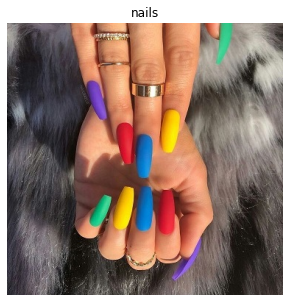

In [43]:
draw_picture(img, 'nails')

###### 2. Реализуйте три модели кластеризации:
        a) KMeans. Рассмотрите число кластеров K = 2, 5, 10, 20.

In [44]:
vectorized = img.reshape((-1,3))
vectorized = np.float32(vectorized)
vectorized

array([[115., 118., 122.],
       [127., 130., 134.],
       [136., 136., 142.],
       ...,
       [ 67.,  69.,  79.],
       [ 88.,  90., 100.],
       [ 68.,  70.,  80.]], dtype=float32)

In [6]:
K = [2, 5, 10, 20]

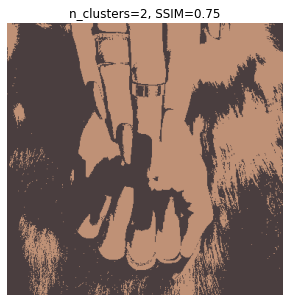

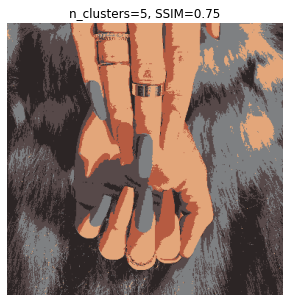

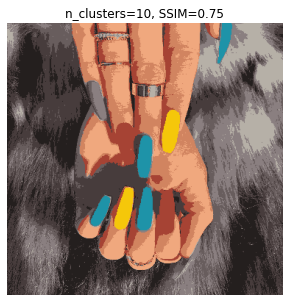

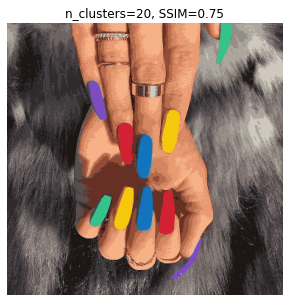

In [88]:
for i in K:
    kmeans = KMeans(n_clusters=i, random_state=0).fit(vectorized)
    centers = np.uint8(kmeans.cluster_centers_)
    segmented_data = centers[kmeans.labels_.flatten()]

    # reshape data into the original image dimensions
    segmented_image = segmented_data.reshape((img.shape))
        
    ssim_score = ssim(img, segmented_image_rgb, channel_axis=2 )
   
    title = f'n_clusters={i}, SSIM={ssim_score:.2f}'

    draw_picture(segmented_image, title)


Выводы: с увеличением количества кластеров - увеличивается схожесть изображений, что логично.

        b) DBSCAN

In [97]:
dbscan = DBSCAN(eps=1.5, min_samples=10).fit(img.reshape((-1,3)))

In [98]:
dbscan.labels_

array([ 0,  0, -1, ..., 20, 20, 20], dtype=int64)

In [99]:
labels=dbscan.labels_
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

Estimated no. of clusters: 1552


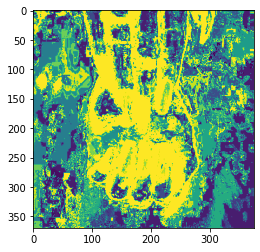

In [91]:
plt.imshow(np.uint8(dbscan.labels_.reshape(img.shape[:2])))
plt.show()

In [92]:
y_pred = dbscan.fit_predict(vectorized)

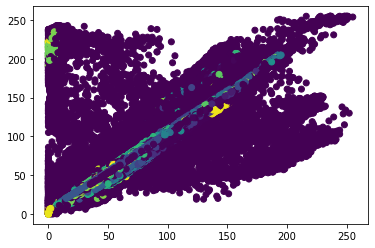

In [93]:
plt.scatter(vectorized[:, 0], vectorized[:, 1], c=y_pred)
plt.show()

In [68]:
dbscan.labels_

array([ 0,  0, -1, ..., 20, 20, 20], dtype=int64)

In [35]:
dbscan.n_features_in_

3

        c) AgglomerativeClustering. Рассмотрите число кластеров K = 2, 5, 10, 20.

In [9]:
img3 =img.reshape((-1,3))
img3

array([[109, 112, 116],
       [118, 121, 125],
       [128, 131, 135],
       ...,
       [ 72,  74,  84],
       [ 67,  69,  79],
       [ 65,  67,  77]], dtype=uint8)

In [10]:
model = AgglomerativeClustering(n_clusters=20, linkage='single').fit(img3)

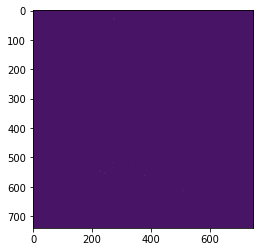

In [11]:
plt.imshow(np.uint8(model.labels_.reshape(img.shape[:2])))
plt.show()

In [13]:
img4 = img
scale_percent = 50 # percent of original size
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)
# resize image
resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
print('Resized Dimensions : ',resized.shape)
 

Resized Dimensions :  (370, 375, 3)


In [14]:
X = np.reshape(img4, (-1, 1))

Compute structured hierarchical clustering...
Elapsed time:  309.9744350910187
Number of pixels:  1665000
Number of clusters:  5


([], [])

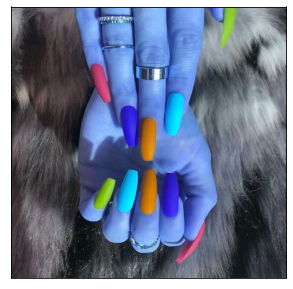

In [21]:
import time as time
from sklearn.feature_extraction.image import grid_to_graph

###############################################################################
# Define the structure A of the data. Pixels connected to their neighbors.
connectivity = grid_to_graph(*img4.shape)

###############################################################################
# Compute clustering
print("Compute structured hierarchical clustering...")
st = time.time()
n_clusters = 5  # number of regions
ward = AgglomerativeClustering(n_clusters=n_clusters,
        linkage='ward', connectivity=connectivity).fit(X)
label = np.reshape(ward.labels_, img4.shape)
print("Elapsed time: ", time.time() - st)
print("Number of pixels: ", label.size)
print("Number of clusters: ", np.unique(label).size)

###############################################################################
# Plot the results on an image
plt.figure(figsize=(5, 5))
plt.imshow(img4, cmap=plt.cm.gray)
# for l in range(n_clusters):
#     plt.contour(label == l, contours=1,
#                 colors=[plt.cm.Spectral(l / float(n_clusters)), ])
plt.xticks(())
plt.yticks(())


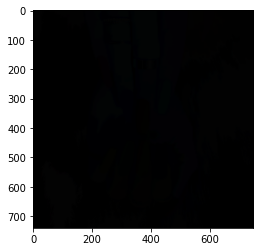

In [31]:
# label

plt.imshow(np.uint8(ward.labels_.reshape(img.shape)))
plt.show()

In [150]:
# label

In [178]:
from PIL import Image
from io import BytesIO    

img = Image.open('nails_x50.jpg') 
arr = np.array(img)

In [179]:
# function to transform the image
def create_image(arr, n_center=3, method='kmeans'):
    
    arr_flat = arr.reshape([arr.shape[0] * arr.shape[1], 3])
    
    if method == 'kmeans':
        cluster_obj = KMeans(n_clusters=n_center, random_state=42)
    elif method == 'dbscan':
        cluster_obj = DBSCAN()
    elif method == 'agglo':
        cluster_obj = AgglomerativeClustering(n_clusters=n_center)
    else:
        raise Exception('unknown clustering method')
    
    cluster = cluster_obj.fit_predict(arr_flat)
    
    arr_df = pd.DataFrame(arr_flat, columns=['r', 'g', 'b'])
    arr_df['cluster'] = cluster
    
    cluster_dict = dict()

    for c in arr_df['cluster'].unique():
        c_ave = arr_df.loc[arr_df['cluster'] == c, ['r', 'g', 'b']].mean(axis=0)
        cluster_dict[c] = c_ave.tolist()
        
    new_arr = [cluster_dict[c] for c in cluster]
    new_arr = np.array(new_arr, dtype=np.uint8)
    new_arr = new_arr.reshape(arr.shape[0], arr.shape[1], 3)
    
    new_img = Image.fromarray(new_arr, mode='RGB')
        
    return new_img, cluster_dict

In [180]:
# different experimentations
kmeans_2, _ = create_image(arr, 2, method='kmeans')
kmeans_5, _ = create_image(arr, 5, method='kmeans')
kmeans_10, _ = create_image(arr, 10, method='kmeans')
kmeans_20, _ = create_image(arr, 20, method='kmeans')

In [ ]:
dbscan, _ = create_image(arr, method='dbscan')

In [194]:
agglo_2, _ = create_image(arr, 2, method='agglo')
agglo_5, _ = create_image(arr, 5, method='agglo')
agglo_10, _ = create_image(arr, 10, method='agglo')
agglo_20, _ = create_image(arr, 20, method='agglo')

MemoryError: Unable to allocate 71.7 GiB for an array with shape (9625711875,) and data type float64

In [187]:
ssim_score_kmeans_2 = ssim(np.array(img), np.array(kmeans_2), channel_axis=2)
ssim_score_kmeans_5 = ssim(np.array(img), np.array(kmeans_5), channel_axis=2)
ssim_score_kmeans_10 = ssim(np.array(img), np.array(kmeans_10), channel_axis=2)
ssim_score_kmeans_20 = ssim(np.array(img), np.array(kmeans_20), channel_axis=2)
   

In [191]:
ssim_score_dbscan = ssim(np.array(img), np.array(dbscan), channel_axis=2)

Text(0.5, 1.0, 'n_clusters=20, SSIM=0.85')

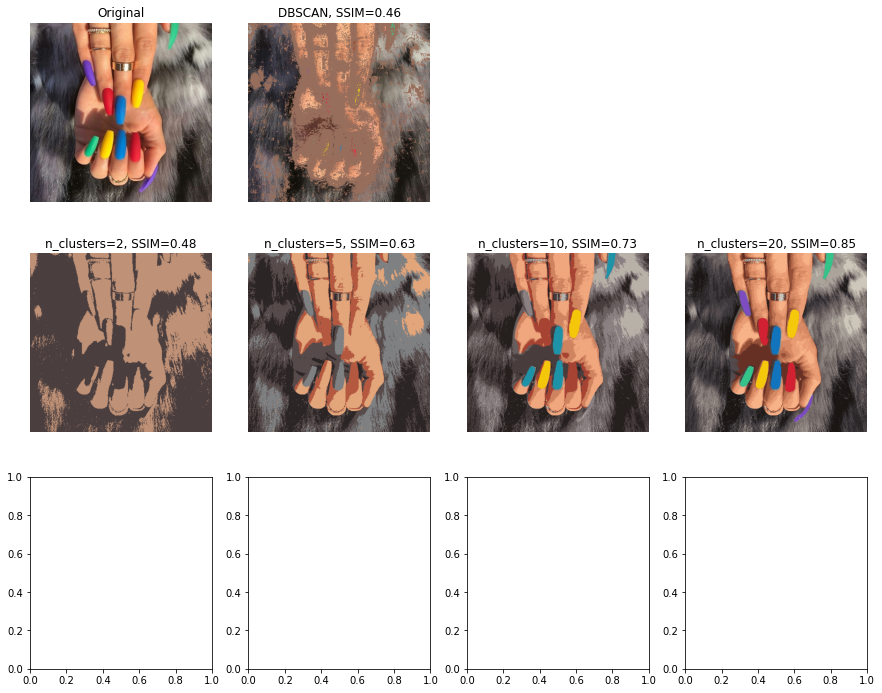

In [193]:

# plot the final photos
f, axarr = plt.subplots(3,4, figsize=(15,12))


axarr[0,0].imshow(arr)
axarr[0,0].axis('off')
axarr[0,0].set_title('Original')

axarr[0,1].imshow(dbscan)
axarr[0,1].axis('off')
axarr[0,1].set_title(f'DBSCAN, SSIM={ssim_score_dbscan:.2f}')

axarr[0,2].axis('off')
axarr[0,3].axis('off')

axarr[1,0].imshow(kmeans_2)
axarr[1,0].axis('off')
axarr[1,0].set_title(f'n_clusters=2, SSIM={ssim_score_kmeans_2:.2f}')

axarr[1,1].imshow(kmeans_5)
axarr[1,1].axis('off')
axarr[1,1].set_title(f'n_clusters=5, SSIM={ssim_score_kmeans_5:.2f}')

axarr[1,2].imshow(kmeans_10)
axarr[1,2].axis('off')
axarr[1,2].set_title(f'n_clusters=10, SSIM={ssim_score_kmeans_10:.2f}')

axarr[1,3].imshow(kmeans_20)
axarr[1,3].axis('off')
axarr[1,3].set_title(f'n_clusters=20, SSIM={ssim_score_kmeans_20:.2f}')
